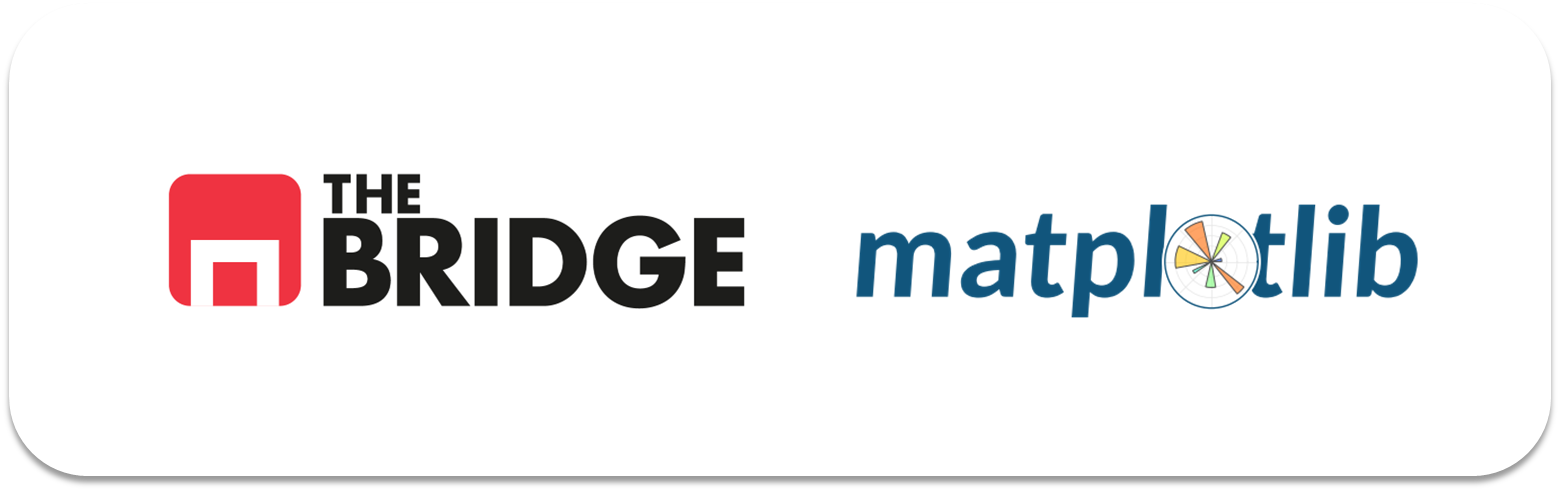

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [6]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 
import numpy as np  

sns.set_theme(style='whitegrid')


## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [5]:
data = pd.read_csv('california_cities.csv')

print("Primeras filas del archivo:")
print(data.head())

ciudades_california = data[['city', 'population_total', 'area_total_km2', 'elevation_m']]

print("\nResumen de los datos seleccionados:")
print(ciudades_california.describe())

Primeras filas del archivo:
   Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  

### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

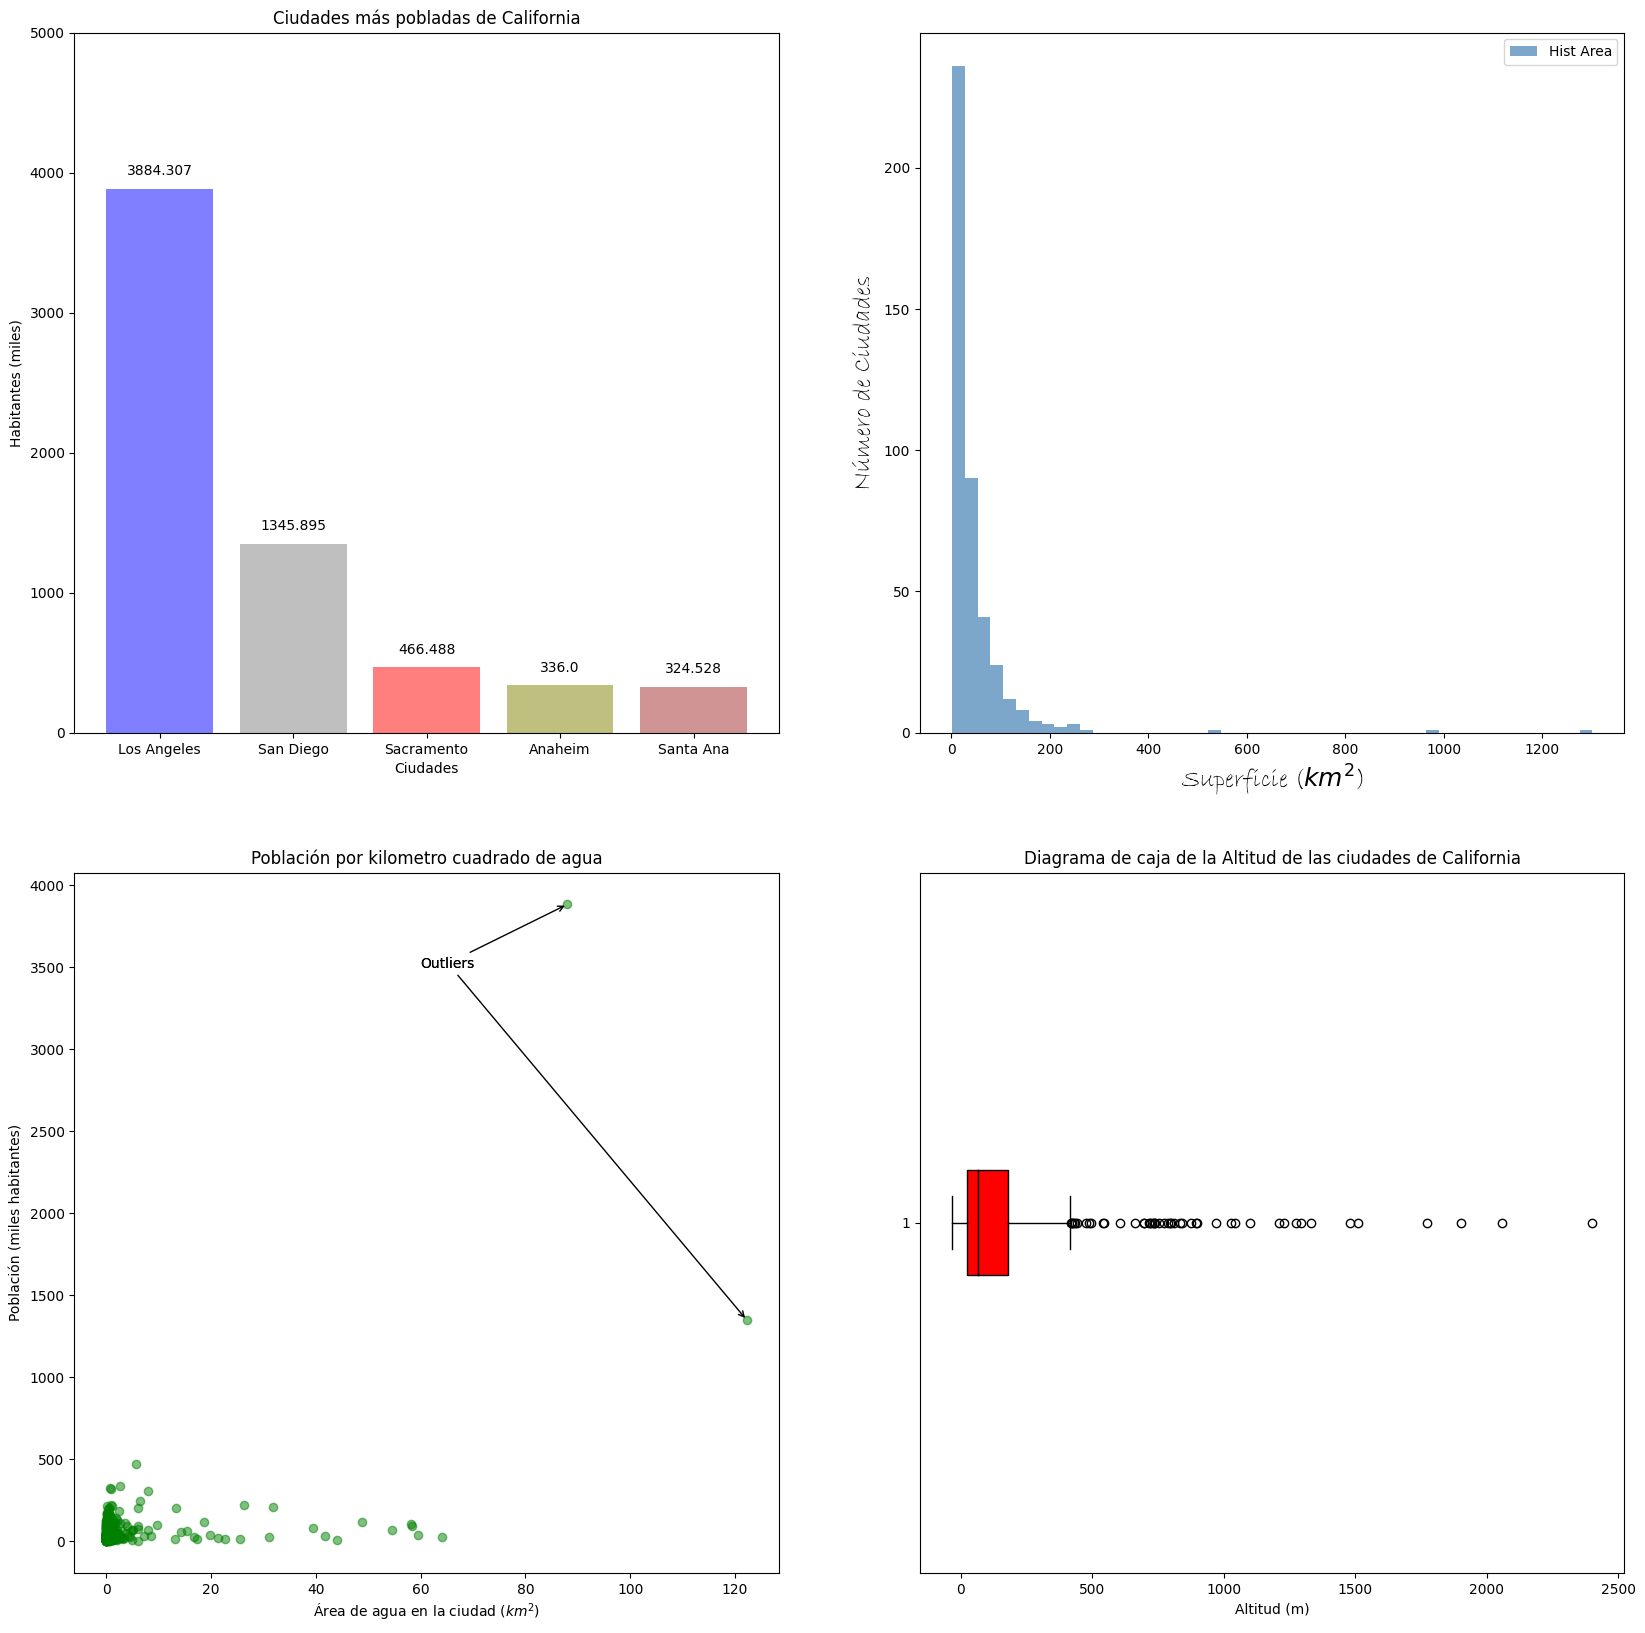

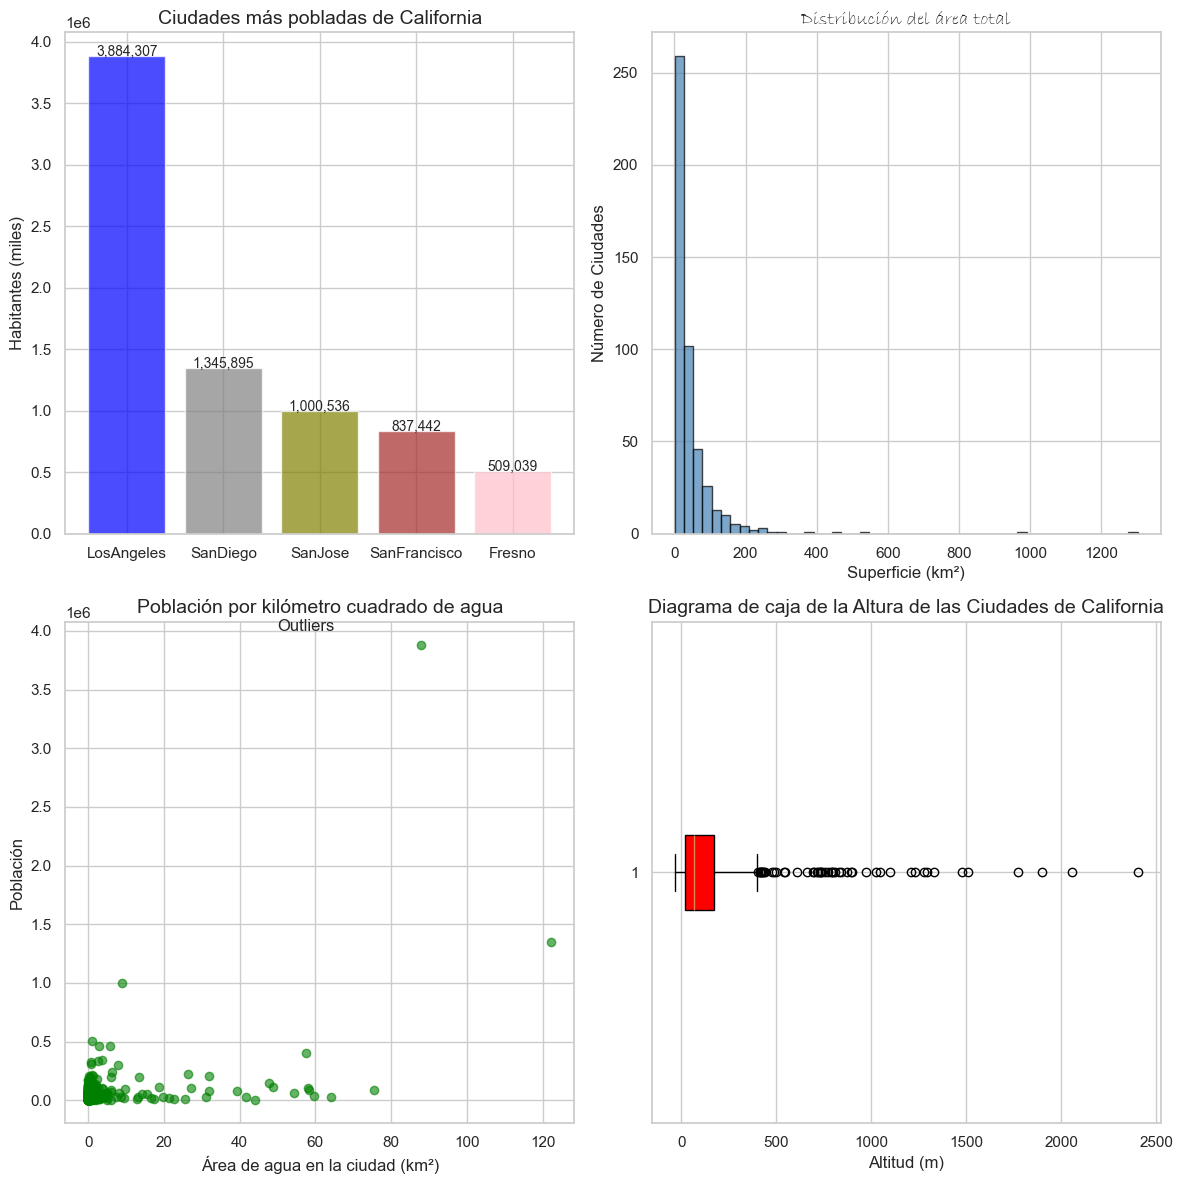

In [ ]:


plt.figure(figsize=(12, 12))

top_cities = data.nlargest(5, 'population_total')[['city', 'population_total']]
plt.subplot(2, 2, 1)
plt.bar(top_cities['city'], top_cities['population_total'], color=['blue', 'gray', 'olive', 'brown', 'pink'], alpha=0.7)
plt.title("Ciudades más pobladas de California", fontsize=14)
plt.ylabel("Habitantes (miles)", fontsize=12)
for i, v in enumerate(top_cities['population_total']):
    plt.text(i, v + 2000, f"{v:,}", ha='center', fontsize=10)  # Centrar los números

plt.subplot(2, 2, 2)
plt.hist(data['area_total_km2'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title("Distribución del área total", fontsize=14, fontname="Bradley Hand ITC")
plt.xlabel("Superficie (km²)", fontsize=12)
plt.ylabel("Número de Ciudades", fontsize=12)

data['density_per_water'] = data['population_total'] / (data['area_water_km2'] + 1e-5)  # Evitar división por cero
plt.subplot(2, 2, 3)
plt.scatter(data['area_water_km2'], data['population_total'], alpha=0.6, color='green')
plt.title("Población por kilómetro cuadrado de agua", fontsize=14)
plt.xlabel("Área de agua en la ciudad (km²)", fontsize=12)
plt.ylabel("Población", fontsize=12)
plt.annotate("Outliers", xy=(80, 3500000), xytext=(50, 4000000), arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.subplot(2, 2, 4)
plt.boxplot(data['elevation_m'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='red', color='black'))
plt.title("Diagrama de caja de la Altura de las Ciudades de California", fontsize=14)
plt.xlabel("Altitud (m)", fontsize=12)

plt.tight_layout()
plt.show()


### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

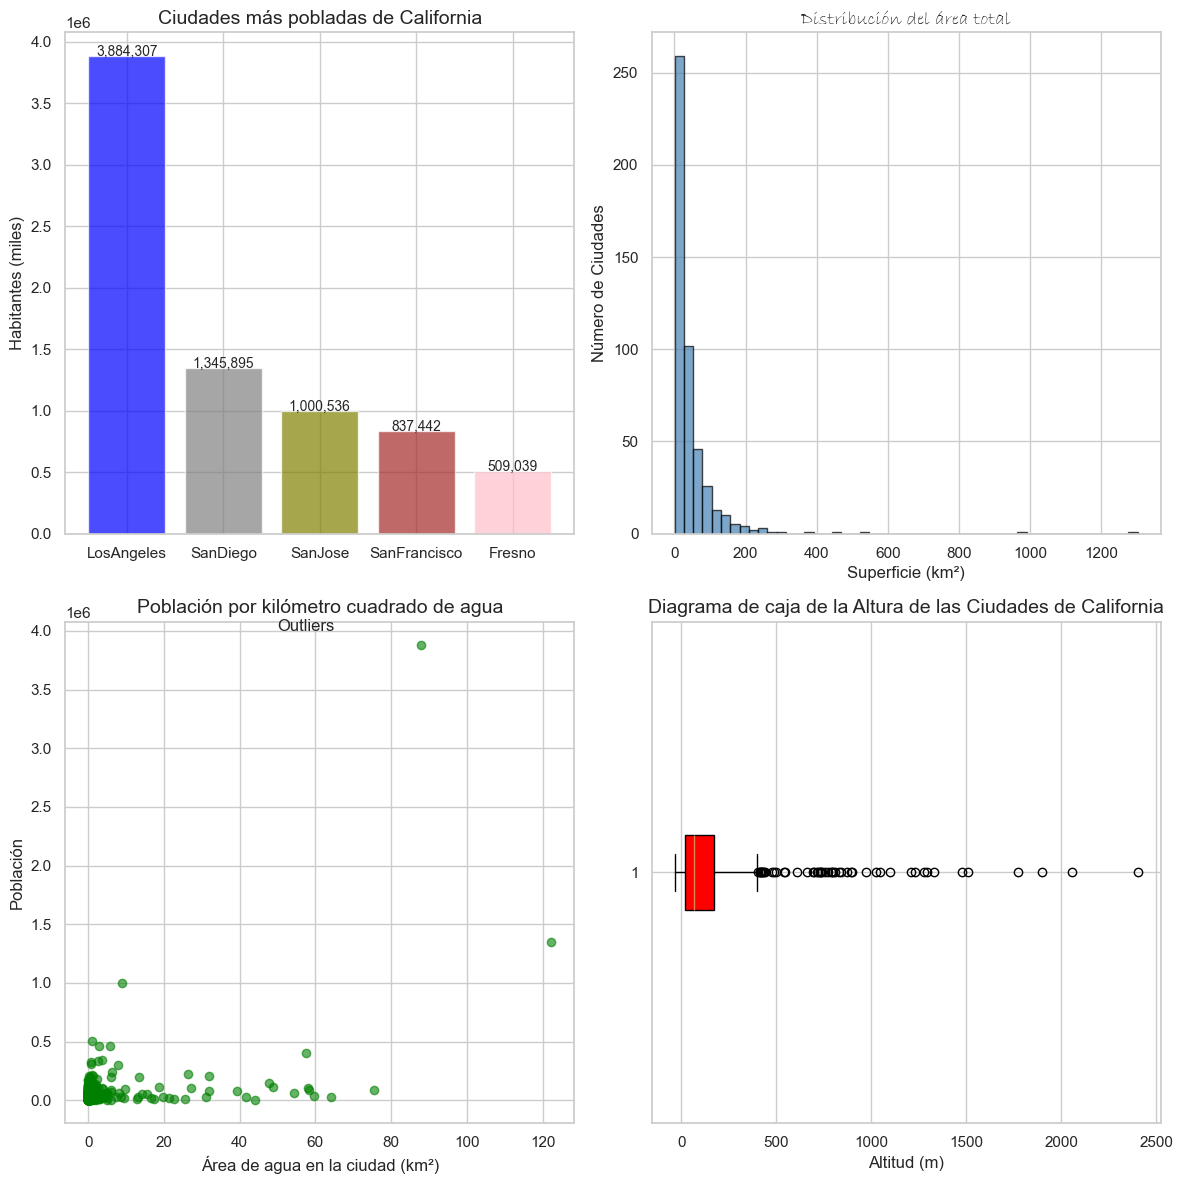

In [ ]:
plt.figure(figsize=(12, 12))

top_cities = data.nlargest(5, 'population_total')[['city', 'population_total']]
plt.subplot(2, 2, 1)
plt.bar(top_cities['city'], top_cities['population_total'], color=['blue', 'gray', 'olive', 'brown', 'pink'], alpha=0.7)
plt.title("Ciudades más pobladas de California", fontsize=14)
plt.ylabel("Habitantes (miles)", fontsize=12)
for i, v in enumerate(top_cities['population_total']):
    plt.text(i, v + 2000, f"{v:,}", ha='center', fontsize=10)  # Centrar los números

plt.subplot(2, 2, 2)
plt.hist(data['area_total_km2'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title("Distribución del área total", fontsize=14, fontname="Bradley Hand ITC")
plt.xlabel("Superficie (km²)", fontsize=12)
plt.ylabel("Número de Ciudades", fontsize=12)

data['density_per_water'] = data['population_total'] / (data['area_water_km2'] + 1e-5)  # Evitar división por cero
plt.subplot(2, 2, 3)
plt.scatter(data['area_water_km2'], data['population_total'], alpha=0.6, color='green')
plt.title("Población por kilómetro cuadrado de agua", fontsize=14)
plt.xlabel("Área de agua en la ciudad (km²)", fontsize=12)
plt.ylabel("Población", fontsize=12)
plt.annotate("Outliers", xy=(80, 3500000), xytext=(50, 4000000), arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.subplot(2, 2, 4)
plt.boxplot(data['elevation_m'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='red', color='black'))
plt.title("Diagrama de caja de la Altura de las Ciudades de California", fontsize=14)
plt.xlabel("Altitud (m)", fontsize=12)

plt.tight_layout()
plt.savefig('figura_ciudades_california.png', dpi=300, bbox_inches='tight')  # Guardar la figura como archivo PNG
plt.show()
